# Import niezbędnych bibliotek do wykonania projektu



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# Wczytanie pliku z danymi za pomocą biblioteki pandas

In [2]:
car_price = pd.read_csv('car_price(1).csv')
car_price

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


# Zrozumienie uwarunkowań biznesowych / badawczych

### Wpływ różnych czynników na ostateczną cenę auta.

Zadaniem projektu jest sprawdzenie, które z czynników najmocniej wpływają na cenę auta, a które z nich nie mają większego znaczenia. Dla każdego klienta końcowego inne cechy auta będą miały priorytetową wartość. Dla rodziny z dziećmi duże znaczenie będzie miał pojemny bagażnik, natomiast dla 30-letniego singla większą rolę odegra moc silnika czy wyposażenie wnętrza. Czynnikami, które są powszechnie uznawane za kluczowe są rok produkcji oraz przebieg samochodu. 

Ten projekt ma za zadanie unaocznić, jak konkretne cechy wpływają na ostateczną cenę samochodu.

# Zrozumienie danych

### Informacje, które pozyskamy z pliku:

Price - cena

Levy - podatek

Manufacturer - producent, marka

Model - model

Prod. year - rok produkcji

Category - rodzaj nadwozia

Leather interior - skórzana tapicerka

Fuel type - rodzaj paliwa

Engine volume - pojemność silnika

Mileage - przebieg samochodu

Cylinders - cylindry

Gear box type - rodzaj skrzyni biegów

Drive wheels - napęd

Doors - drzwi

Wheel - strona, po której stronie znajduje się koło kierownicy

Color - kolor

Airbags - poduszki powietrzne

# Przygotowanie danych

Wyświetlenie informacji o DF wraz z typami danych zawartych w danych kolumnach, usunięcie zbędnych komórek, zmiana formatu komórek, oczyszczenie danych, zamiana informacji typu string "Yes" oraz "No" na wartości liczbowe "1" oraz "0".

In [3]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [4]:
car_price = car_price.copy()
car_price.drop(['ID', 'Levy'], axis=1, inplace=True)
car_price

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,15681,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,26108,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,5331,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [5]:
car_price["Doors"].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [6]:
car_price['Doors'] = car_price['Doors'].str.replace("04-May", "4")
car_price['Doors'] = car_price['Doors'].str.replace('02-Mar', '2')
car_price["Doors"] = car_price["Doors"].str.replace(">5","5")

In [7]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Manufacturer      19237 non-null  object 
 2   Model             19237 non-null  object 
 3   Prod. year        19237 non-null  int64  
 4   Category          19237 non-null  object 
 5   Leather interior  19237 non-null  object 
 6   Fuel type         19237 non-null  object 
 7   Engine volume     19237 non-null  object 
 8   Mileage           19237 non-null  object 
 9   Cylinders         19237 non-null  float64
 10  Gear box type     19237 non-null  object 
 11  Drive wheels      19237 non-null  object 
 12  Doors             19237 non-null  object 
 13  Wheel             19237 non-null  object 
 14  Color             19237 non-null  object 
 15  Airbags           19237 non-null  int64  
dtypes: float64(1), int64(3), object(12)
memo

In [8]:
car_price

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,4,Left wheel,Silver,12
1,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,4,Left wheel,Black,8
2,8467,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,4,Right-hand drive,Black,2
3,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,4,Left wheel,White,0
4,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,4,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,2,Left wheel,Silver,5
19233,15681,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,4,Left wheel,Red,8
19234,26108,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,4,Left wheel,Grey,4
19235,5331,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,4,Left wheel,Black,4


In [9]:
car_price["Engine volume"] = car_price["Engine volume"].str.replace(" Turbo", "")
car_price["Engine volume"].head(15)

0     3.5
1       3
2     1.3
3     2.5
4     1.3
5       2
6     1.8
7     2.4
8     2.5
9     3.5
10    3.5
11      4
12    1.6
13    3.5
14      2
Name: Engine volume, dtype: object

In [10]:
car_price["Doors"] = car_price["Doors"].astype(int)
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Manufacturer      19237 non-null  object 
 2   Model             19237 non-null  object 
 3   Prod. year        19237 non-null  int64  
 4   Category          19237 non-null  object 
 5   Leather interior  19237 non-null  object 
 6   Fuel type         19237 non-null  object 
 7   Engine volume     19237 non-null  object 
 8   Mileage           19237 non-null  object 
 9   Cylinders         19237 non-null  float64
 10  Gear box type     19237 non-null  object 
 11  Drive wheels      19237 non-null  object 
 12  Doors             19237 non-null  int32  
 13  Wheel             19237 non-null  object 
 14  Color             19237 non-null  object 
 15  Airbags           19237 non-null  int64  
dtypes: float64(1), int32(1), int64(3), objec

In [11]:
car_price["Mileage"] = car_price["Mileage"].str.replace("km", "")
car_price["Mileage"].head(15)

0     186005 
1     192000 
2     200000 
3     168966 
4      91901 
5     160931 
6     258909 
7     216118 
8     398069 
9     128500 
10    184467 
11         0 
12    350000 
13    138038 
14     76000 
Name: Mileage, dtype: object

In [12]:
car_price["Mileage"] = car_price["Mileage"].astype(int)
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Manufacturer      19237 non-null  object 
 2   Model             19237 non-null  object 
 3   Prod. year        19237 non-null  int64  
 4   Category          19237 non-null  object 
 5   Leather interior  19237 non-null  object 
 6   Fuel type         19237 non-null  object 
 7   Engine volume     19237 non-null  object 
 8   Mileage           19237 non-null  int32  
 9   Cylinders         19237 non-null  float64
 10  Gear box type     19237 non-null  object 
 11  Drive wheels      19237 non-null  object 
 12  Doors             19237 non-null  int32  
 13  Wheel             19237 non-null  object 
 14  Color             19237 non-null  object 
 15  Airbags           19237 non-null  int64  
dtypes: float64(1), int32(2), int64(3), objec

In [13]:
car_price["Engine volume"] = car_price["Engine volume"].astype(float)

In [14]:
car_price["Leather interior"] = car_price["Leather interior"].str.replace("Yes", "1")
car_price["Leather interior"] = car_price["Leather interior"].str.replace("No", "0")

In [15]:
car_price["Leather interior"].head(15)

0     1
1     0
2     0
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    0
12    0
13    1
14    1
Name: Leather interior, dtype: object

In [16]:
car_price["Leather interior"] = car_price["Leather interior"].astype(int)

In [17]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Manufacturer      19237 non-null  object 
 2   Model             19237 non-null  object 
 3   Prod. year        19237 non-null  int64  
 4   Category          19237 non-null  object 
 5   Leather interior  19237 non-null  int32  
 6   Fuel type         19237 non-null  object 
 7   Engine volume     19237 non-null  float64
 8   Mileage           19237 non-null  int32  
 9   Cylinders         19237 non-null  float64
 10  Gear box type     19237 non-null  object 
 11  Drive wheels      19237 non-null  object 
 12  Doors             19237 non-null  int32  
 13  Wheel             19237 non-null  object 
 14  Color             19237 non-null  object 
 15  Airbags           19237 non-null  int64  
dtypes: float64(2), int32(3), int64(3), objec

In [18]:
car_price

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12
1,16621,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8
2,8467,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2
3,3607,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0
4,11726,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,MERCEDES-BENZ,CLK 200,1999,Coupe,1,CNG,2.0,300000,4.0,Manual,Rear,2,Left wheel,Silver,5
19233,15681,HYUNDAI,Sonata,2011,Sedan,1,Petrol,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,Red,8
19234,26108,HYUNDAI,Tucson,2010,Jeep,1,Diesel,2.0,116365,4.0,Automatic,Front,4,Left wheel,Grey,4
19235,5331,CHEVROLET,Captiva,2007,Jeep,1,Diesel,2.0,51258,4.0,Automatic,Front,4,Left wheel,Black,4


In [19]:
list(car_price.columns)   

['Price',
 'Manufacturer',
 'Model',
 'Prod. year',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Mileage',
 'Cylinders',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color',
 'Airbags']

In [20]:
car_price['Prod. year']

0        2010
1        2011
2        2006
3        2011
4        2014
         ... 
19232    1999
19233    2011
19234    2010
19235    2007
19236    2012
Name: Prod. year, Length: 19237, dtype: int64

In [21]:
car_price['Manufacturer'].value_counts()

HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: Manufacturer, Length: 65, dtype: int64

In [22]:
car_price['Model'].value_counts()

Prius                    1083
Sonata                   1079
Camry                     938
Elantra                   922
E 350                     542
                         ... 
Feroza                      1
C-MAX C-MAX                 1
X1 4X4                      1
Land Cruiser Prado RX       1
Prius C aqua                1
Name: Model, Length: 1590, dtype: int64

### Pokazujemy kilka przykładów cech kategorycznych takich jak marka, kategoria samochodu, typ paliwa i kolor, jak kształtuje się cena samochodu w przypadku tych cech

In [23]:
car_price['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

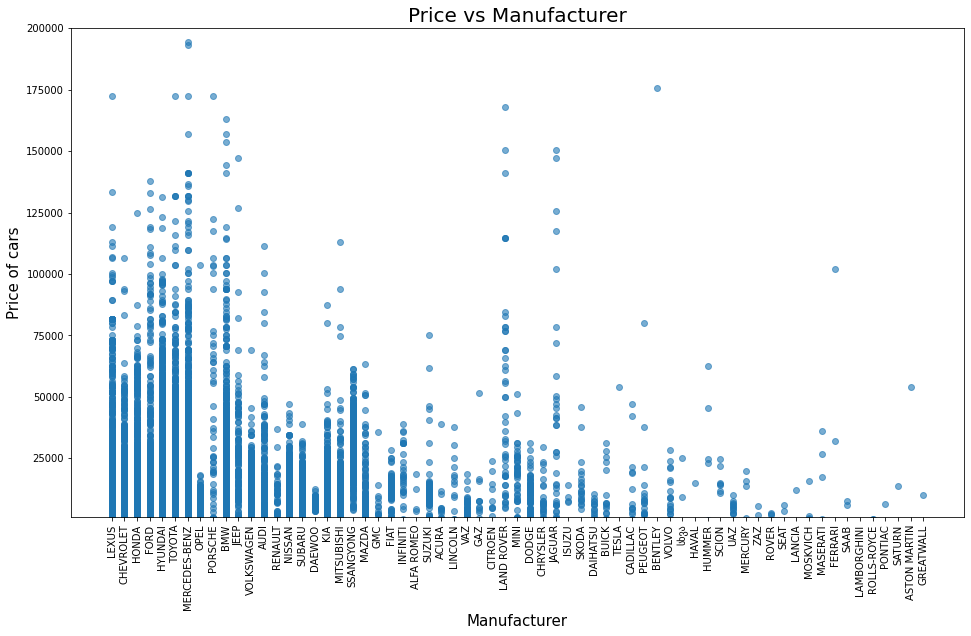

In [24]:
fig, ax = plt.subplots(figsize=(16,9))
plt.scatter(car_price["Manufacturer"], car_price['Price'], alpha=0.6)
plt.ylim(1000,200000)
ax.xaxis.set_tick_params(rotation=90)
plt.xlabel("Manufacturer", size=15)
plt.ylabel('Price of cars', size=15)
plt.title("Price vs Manufacturer", size=20)
plt.show()

In [25]:
car_price['Category'].unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Limousine',
       'Pickup'], dtype=object)

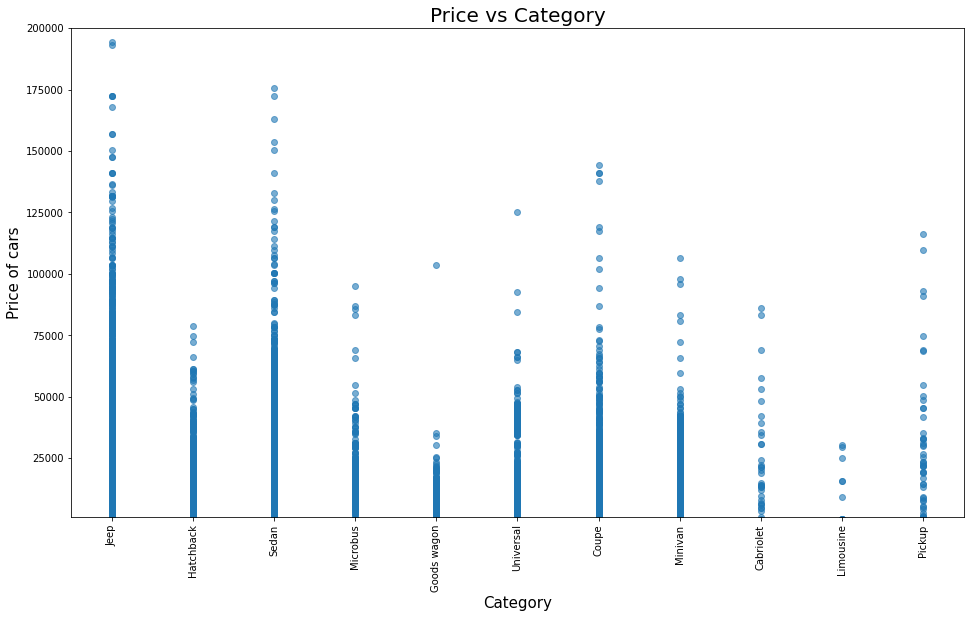

In [26]:
fig, ax = plt.subplots(figsize=(16,9))
plt.scatter(car_price['Category'], car_price['Price'], alpha=0.6)
plt.ylim(1000,200000)
ax.xaxis.set_tick_params(rotation=90)
plt.xlabel('Category', size=15)
plt.ylabel('Price of cars', size=15)
plt.title("Price vs Category", size=20)
plt.show()

In [27]:
car_price['Fuel type'].unique()

array(['Hybrid', 'Petrol', 'Diesel', 'CNG', 'Plug-in Hybrid', 'LPG',
       'Hydrogen'], dtype=object)

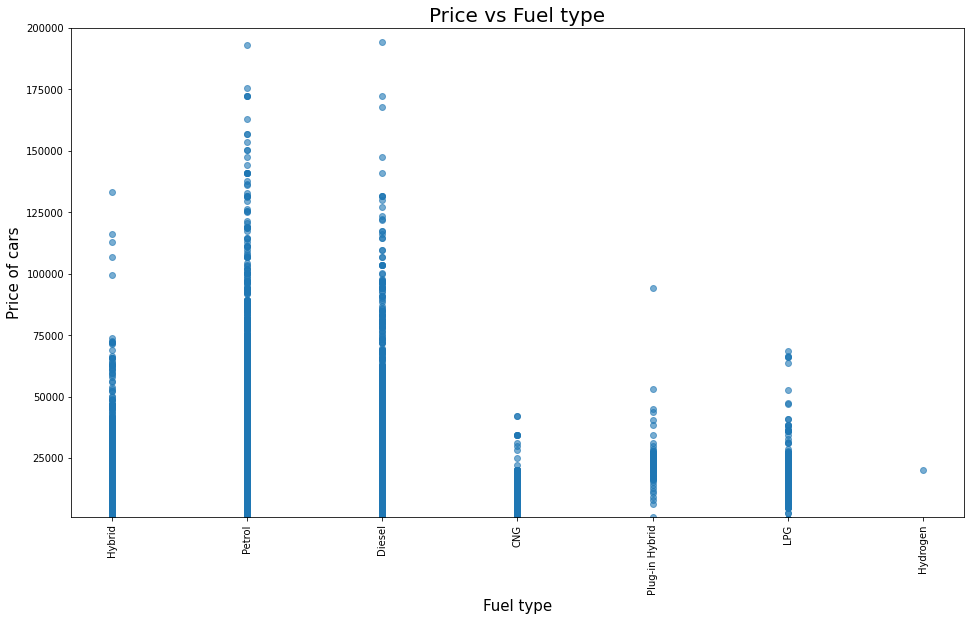

In [28]:
fig, ax = plt.subplots(figsize=(16,9))
plt.scatter(car_price['Fuel type'], car_price['Price'], alpha=0.6)
plt.ylim(1000,200000)
ax.xaxis.set_tick_params(rotation=90)
plt.xlabel('Fuel type', size=15)
plt.ylabel('Price of cars', size=15)
plt.title("Price vs Fuel type", size=20)
plt.show()

In [29]:
car_price['Color'].unique()

array(['Silver', 'Black', 'White', 'Grey', 'Blue', 'Green', 'Red',
       'Sky blue', 'Orange', 'Yellow', 'Brown', 'Golden', 'Beige',
       'Carnelian red', 'Purple', 'Pink'], dtype=object)

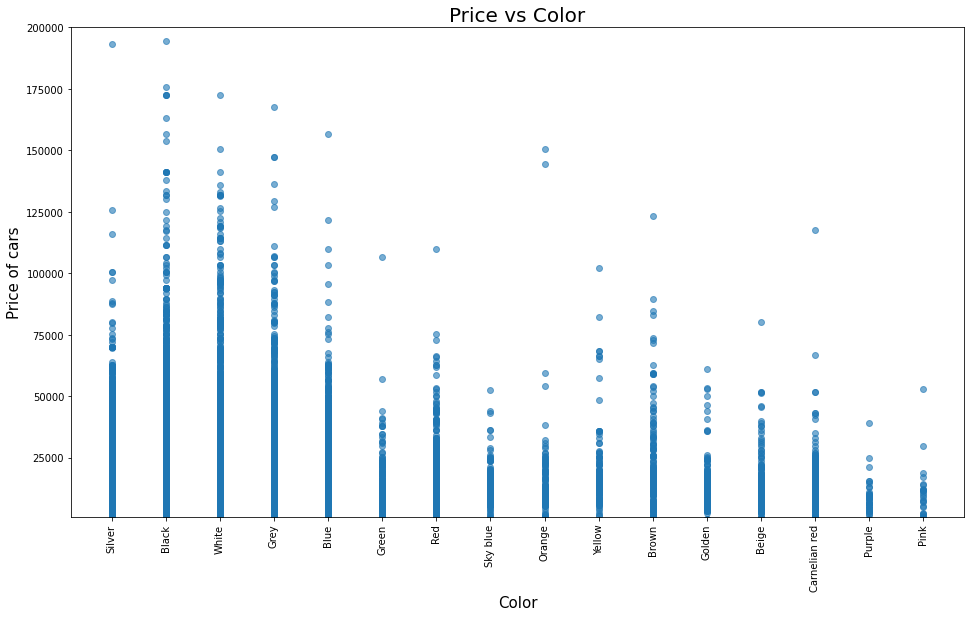

In [30]:
fig, ax = plt.subplots(figsize=(16,9))
plt.scatter(car_price['Color'], car_price['Price'], alpha=0.6)
plt.ylim(1000,200000)
ax.xaxis.set_tick_params(rotation=90)
plt.xlabel('Color', size=15)
plt.ylabel('Price of cars', size=15)
plt.title("Price vs Color", size=20)
plt.show()

### Poniżej kolejne przykłady zależności ceny od wyposażenia

In [31]:
gearbox_types = car_price['Gear box type'].unique()
for gearbox in gearbox_types:
    a = 0
    sc = 0
    print('Średnia cena dla skrzyni ' + gearbox + ': ')
    for index, car in car_price.iterrows():
        if (car['Gear box type'] == gearbox and car['Leather interior'] == 1):
            sc += car['Price']
            a += 1
    sc = sc / a
    print(sc)

Średnia cena dla skrzyni Automatic: 
16533.300506621632
Średnia cena dla skrzyni Tiptronic: 
30587.68418560606
Średnia cena dla skrzyni Variator: 
18681.216216216217
Średnia cena dla skrzyni Manual: 
14631.31436314363


In [32]:
gearbox_types = car_price['Gear box type'].unique()
for gearbox in gearbox_types:
    a = 0
    sc = 0
    print('Średnia cena dla skrzyni ' + gearbox + ': ')
    for index, car in car_price.iterrows():
        if (car['Gear box type'] == gearbox and car['Leather interior'] == 0):
            sc += car['Price']
            a += 1
    sc = sc / a
    print(sc)

Średnia cena dla skrzyni Automatic: 
13195.262041537782
Średnia cena dla skrzyni Tiptronic: 
17617.636363636364
Średnia cena dla skrzyni Variator: 
13102.137404580153
Średnia cena dla skrzyni Manual: 
28306.092961487382


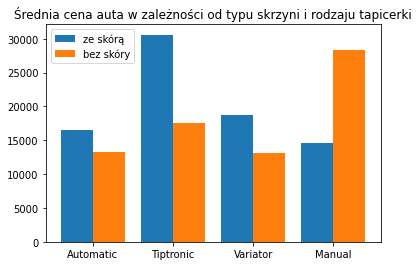

In [33]:
width = 0.4
labels = ('Automatic','Tiptronic','Variator','Manual')
index = np.arange(len(labels))
values_A = [16533.300506621632, 30587.68418560606, 18681.216216216217, 14631.31436314363]
values_B = [13195.262041537782, 17617.636363636364, 13102.137404580153, 28306.092961487382]
plt.bar(index - width/2, values_A, width, label='ze skórą')
plt.bar(index + width/2, values_B, width, label='bez skóry')
plt.xticks(index, labels)
plt.legend()
plt.title('Średnia cena auta w zależności od typu skrzyni i rodzaju tapicerki')
plt.show()

In [34]:
car_price['Drive wheels'].unique()

array(['4x4', 'Front', 'Rear'], dtype=object)

Obliczenie średniej ceny aut w zależności od rodzaju paliwa i napędu - RWD - tylni napęd

In [35]:

fuel_types = car_price['Fuel type'].unique()
for fuel in fuel_types:
    a = 0
    sc = 0
    print('Średnia cena dla rodzaju paliwa ' + fuel + ': ')
    for index, car in car_price.iterrows():
        if (car['Fuel type'] == fuel and car['Drive wheels'] == 'Rear'):
            sc += car['Price']
            a += 1
    if a>0:
        sc = sc / a
    else:
        print('Brak wystąpień')
    print(sc)

Średnia cena dla rodzaju paliwa Hybrid: 
19143.864864864863
Średnia cena dla rodzaju paliwa Petrol: 
18917.91878172589
Średnia cena dla rodzaju paliwa Diesel: 
16039.804379562043
Średnia cena dla rodzaju paliwa CNG: 
7553.493333333333
Średnia cena dla rodzaju paliwa Plug-in Hybrid: 
22580.0
Średnia cena dla rodzaju paliwa LPG: 
13002.264150943396
Średnia cena dla rodzaju paliwa Hydrogen: 
Brak wystąpień
0


Obliczenie średniej ceny aut w zależności od rodzaju paliwa i napędu - FWD - przedni napęd

In [36]:

fuel_types = car_price['Fuel type'].unique()
for fuel in fuel_types:
    a = 0
    sc = 0
    print('Średnia cena dla rodzaju paliwa ' + fuel + ': ')
    for index, car in car_price.iterrows():
        if (car['Fuel type'] == fuel and car['Drive wheels'] == 'Front'):
            sc += car['Price']
            a += 1
    if a>0:
        sc = sc / a
    else:
        print('Brak wystąpień')
    print(sc)

Średnia cena dla rodzaju paliwa Hybrid: 
10611.010352636687
Średnia cena dla rodzaju paliwa Petrol: 
15544.893057559724
Średnia cena dla rodzaju paliwa Diesel: 
37694.141446068745
Średnia cena dla rodzaju paliwa CNG: 
6740.7032967032965
Średnia cena dla rodzaju paliwa Plug-in Hybrid: 
23057.060240963856
Średnia cena dla rodzaju paliwa LPG: 
13004.762349799734
Średnia cena dla rodzaju paliwa Hydrogen: 
20385.0


Obliczenie średniej ceny aut w zależności od rodzaju paliwa i napędu - AWD - napęd na 4 koła

In [37]:

fuel_types = car_price['Fuel type'].unique()
for fuel in fuel_types:
    a = 0
    sc = 0
    print('Średnia cena dla rodzaju paliwa ' + fuel + ': ')
    for index, car in car_price.iterrows():
        if (car['Fuel type'] == fuel and car['Drive wheels'] == '4x4'):
            sc += car['Price']
            a += 1
    if a>0:
        sc = sc / a
    else:
        print('Brak wystąpień')
    print(sc)

Średnia cena dla rodzaju paliwa Hybrid: 
11804.25111111111
Średnia cena dla rodzaju paliwa Petrol: 
21049.25414364641
Średnia cena dla rodzaju paliwa Diesel: 
21019.348780487806
Średnia cena dla rodzaju paliwa CNG: 
11382.135802469136
Średnia cena dla rodzaju paliwa Plug-in Hybrid: 
50961.5
Średnia cena dla rodzaju paliwa LPG: 
16025.91111111111
Średnia cena dla rodzaju paliwa Hydrogen: 
Brak wystąpień
0


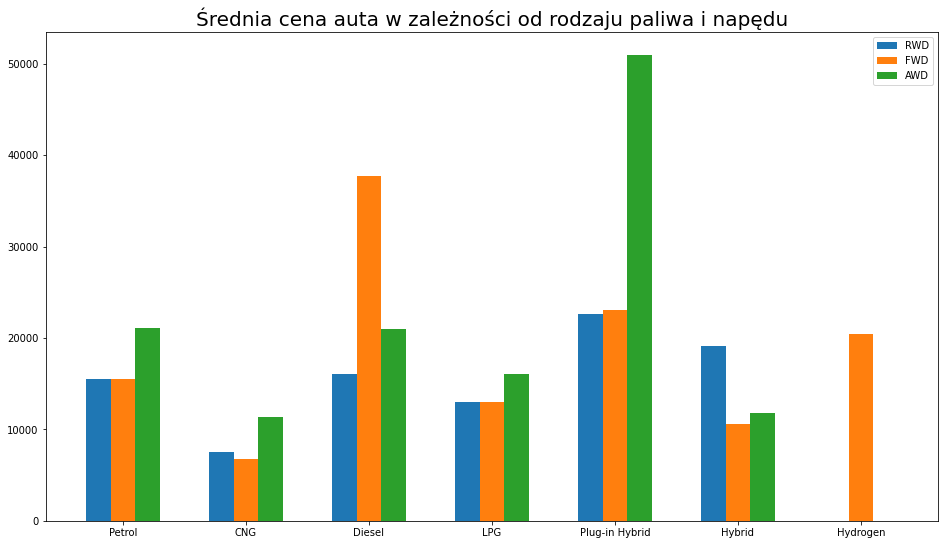

In [38]:
fig, ax = plt.subplots(figsize=(16, 9))
width = 0.2
labels = ('Petrol','CNG', 'Diesel', 'LPG', 'Plug-in Hybrid', 'Hybrid', 'Hydrogen')
index = np.arange(len(labels))
rear = [15544.893057559724, 7553.493333333333, 16039.804379562043, 13002.264150943396, 22580.0, 19143.864864864863, 0.0]
front = [15544.893057559724, 6740.7032967032965, 37694.141446068745, 13004.762349799734, 23057.060240963856, 10611.010352636687, 20385.0]
fourWheels = [21049.25414364641, 11382.135802469136, 21019.348780487806, 16025.91111111111, 50961.5, 11804.25111111111, 0.0]
plt.bar(index - width, rear, width, label='RWD')
plt.bar(index, front, width, label='FWD')
plt.bar(index + width, fourWheels, width, label='AWD')
plt.xticks(index, labels)
plt.legend()
plt.title('Średnia cena auta w zależności od rodzaju paliwa i napędu',size=20 )
plt.show()

Powyższy wykres pokazuje jaki wpływ na cenę auta ma rodzaj napędu, w przypadku podzielenia samochodów ze względu na typ paliwa (zasilania).
W przypadku benzyny, CNG, LPG czy hybryd rodzaj napędu nie ma większego wpływu na cenę.
Auta z silnikami diesla natomiast są droższe, jeśli mają napęd na przednie koła.
Podobna sytuacja występuje w Plug-in Hybrid, z tą różnicą, że najdroższe auta tego typu mają napęd na 4 koła.

# Wyświetlenie podstawowych statystyk przydatnych do analizy problemu.

In [39]:
car_price.describe()

,Price,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,Airbags
count,1.923700e+04,19237.000000,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,1.855593e+04,2010.912824,0.725373,2.307990,1.532236e+06,4.582991,3.925872,6.582627
std,1.905813e+05,5.668673,0.446338,0.877805,4.840387e+07,1.199933,0.403399,4.320168
min,1.000000e+00,1939.000000,0.000000,0.000000,0.000000e+00,1.000000,2.000000,0.000000
25%,5.331000e+03,2009.000000,0.000000,1.800000,7.013900e+04,4.000000,4.000000,4.000000
50%,1.317200e+04,2012.000000,1.000000,2.000000,1.260000e+05,4.000000,4.000000,6.000000
75%,2.207500e+04,2015.000000,1.000000,2.500000,1.888880e+05,4.000000,4.000000,12.000000
max,2.630750e+07,2020.000000,1.000000,20.000000,2.147484e+09,16.000000,5.000000,16.000000


In [40]:
# zobaczymy jak wygląda rozkład naszych danych ale tylko dla kolumny Price

car_price['Price'].describe()

count    1.923700e+04
mean     1.855593e+04
std      1.905813e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.207500e+04
max      2.630750e+07
Name: Price, dtype: float64

Widzimy z powyższego zetawienia dla ceny, że mediana to 13172 a średnia to 17113 czyli możemy się spodziewać, że rozkład y będzie skośny

In [41]:
car_price.columns

Index(['Price', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

#### Usuwamy 3 skrajne wartości

In [42]:
car_price = car_price.sort_values('Price')
car_price = car_price.iloc[:-3,]


### Dane numeryczne, kategoryczne i target

In [43]:
numeric = ['Prod. year', 'Engine volume', 'Mileage']
categorical = ['Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Cylinders', 'Doors', 'Airbags', 'Manufacturer', 'Model']

target = 'Price'

Wykres - czy występuje korelacja dla cech numerycznych

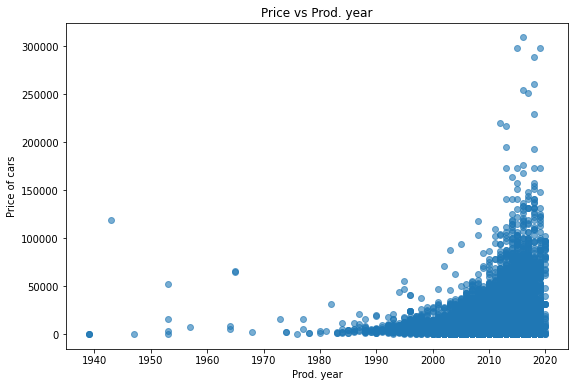

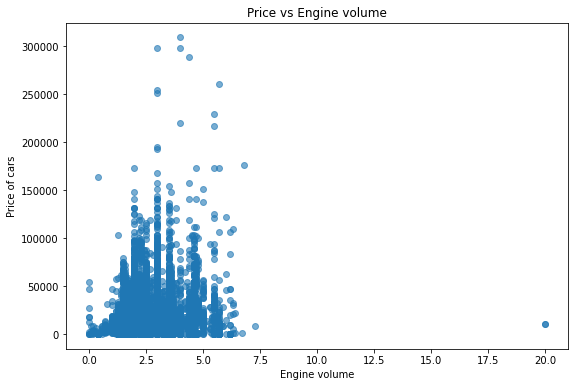

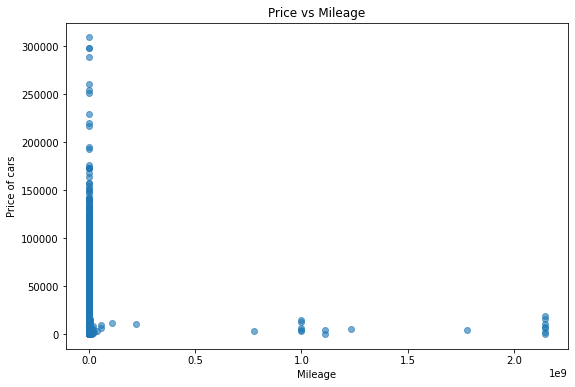

In [44]:
for numeric in numeric:
    fig = plt.figure(figsize=(9, 6))
    plt.scatter(car_price[numeric], car_price[target], alpha=0.6)
    plt.xlabel(numeric)   
    plt.ylabel('Price of cars')   
    plt.title(f'Price vs {numeric}')  
    plt.show()

#### Macierz korelacji pomiędzy cechami numerycznymi

In [45]:
corr_df = car_price.copy()
corr_df = corr_df[['Price', 'Prod. year', 'Engine volume', 'Mileage']]
corr_df.corr()

,Price,Prod. year,Engine volume,Mileage
Price,1.000000,0.286330,0.130558,-0.015991
Prod. year,0.286330,1.000000,-0.031532,-0.063514
Engine volume,0.130558,-0.031532,1.000000,-0.006284
Mileage,-0.015991,-0.063514,-0.006284,1.000000


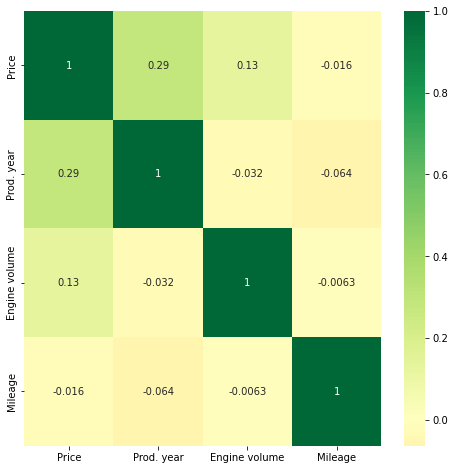

In [46]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(car_price[['Price', 'Prod. year', 'Engine volume', 'Mileage']].corr(), cmap='RdYlGn', center=0, annot=True)
plt.show()

Na podstawie heatmapy można uznać, że najbardziej skorelowany z ceną samochodu jest rok produkcji (0.29).

### Wykres skrzypcowy

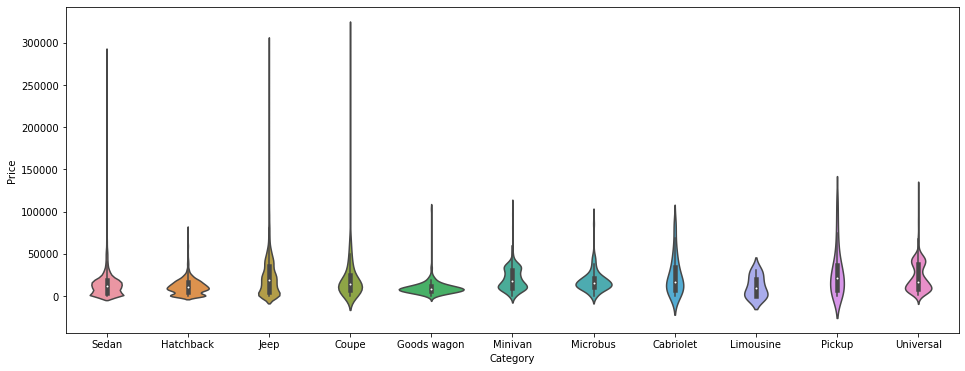

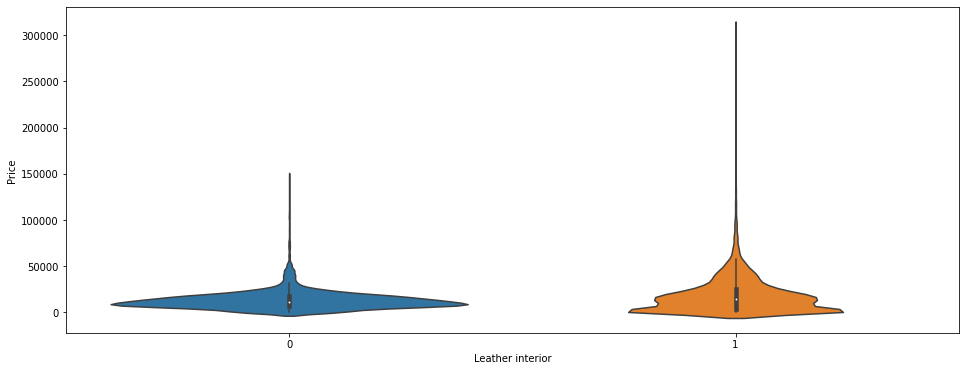

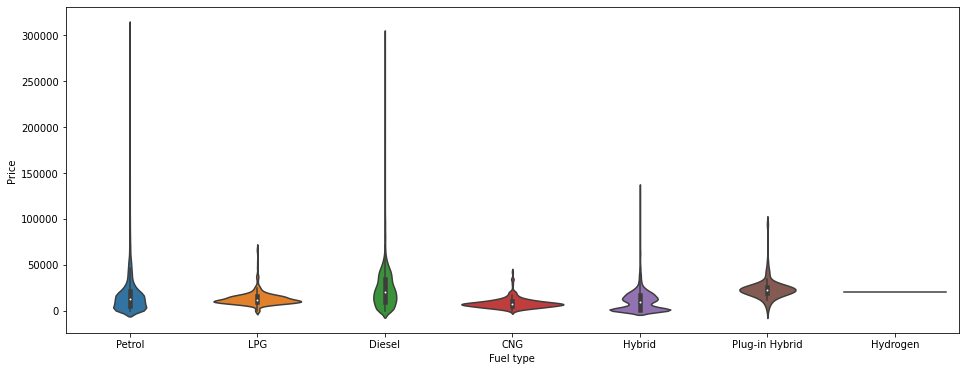

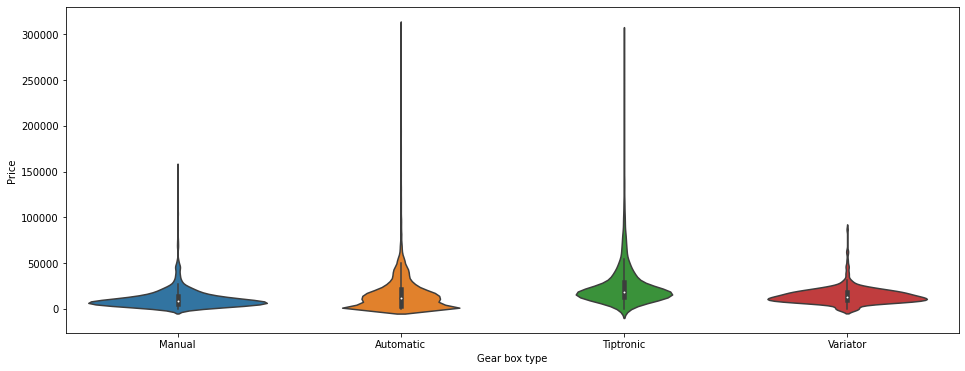

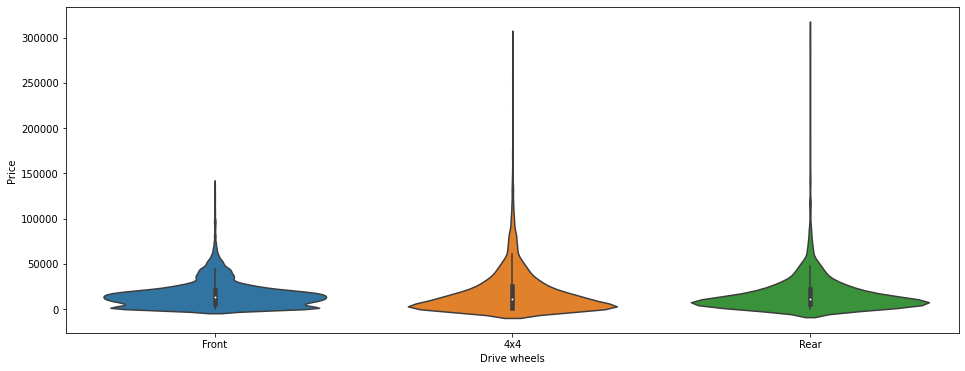

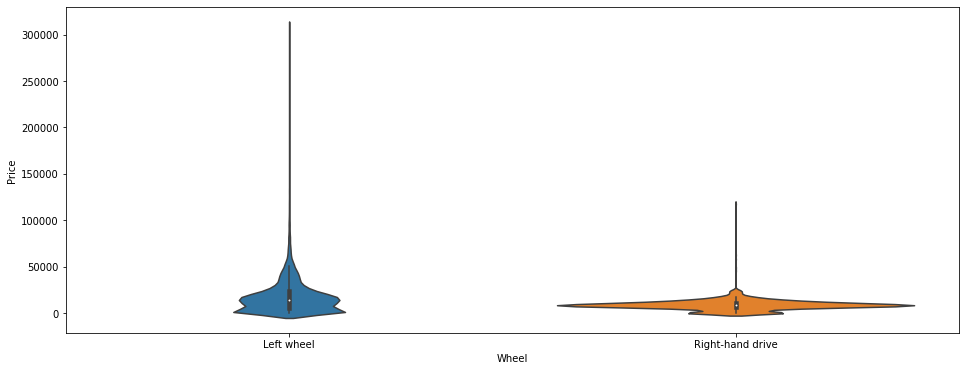

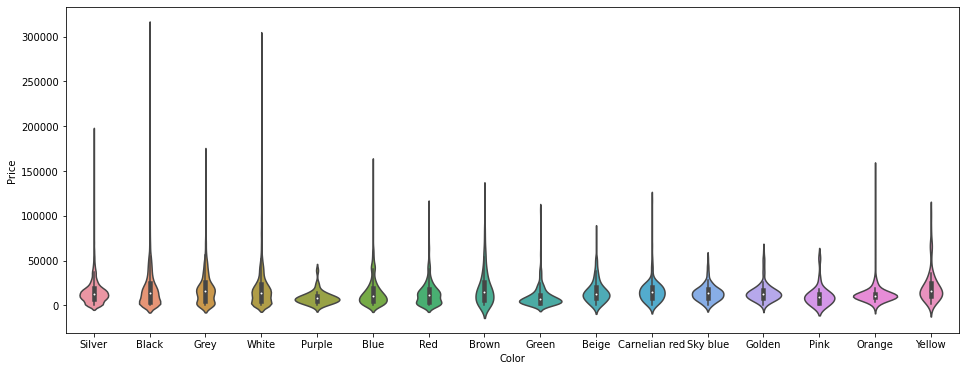

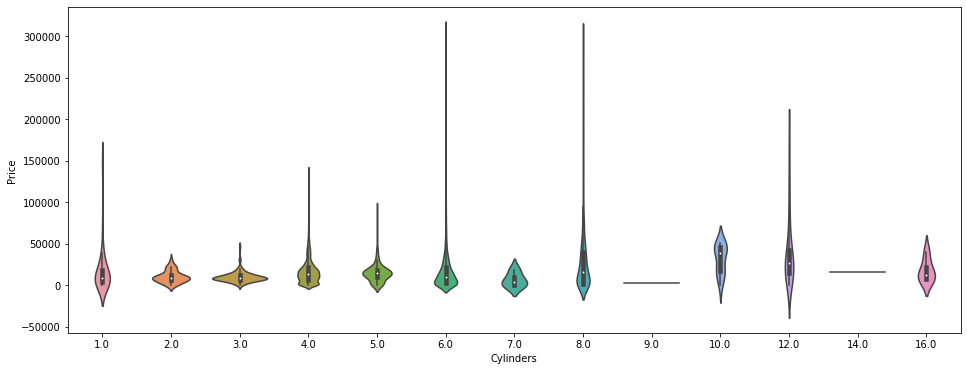

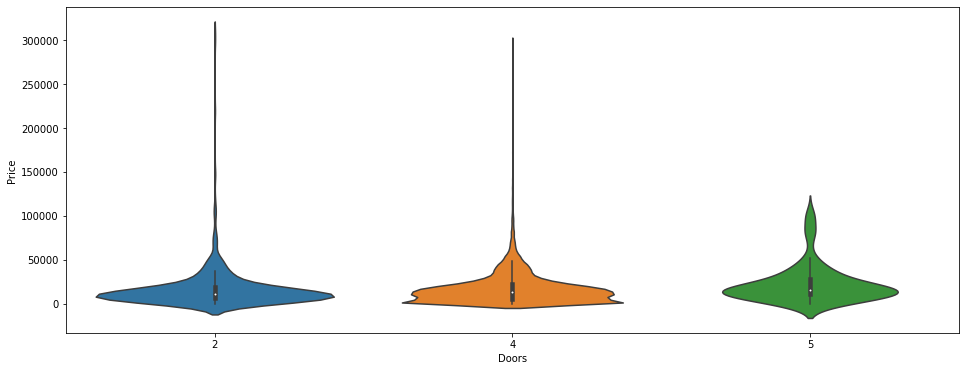

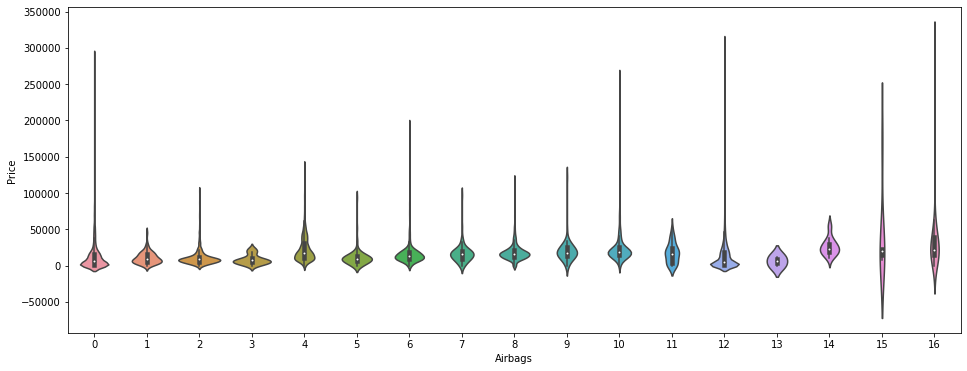

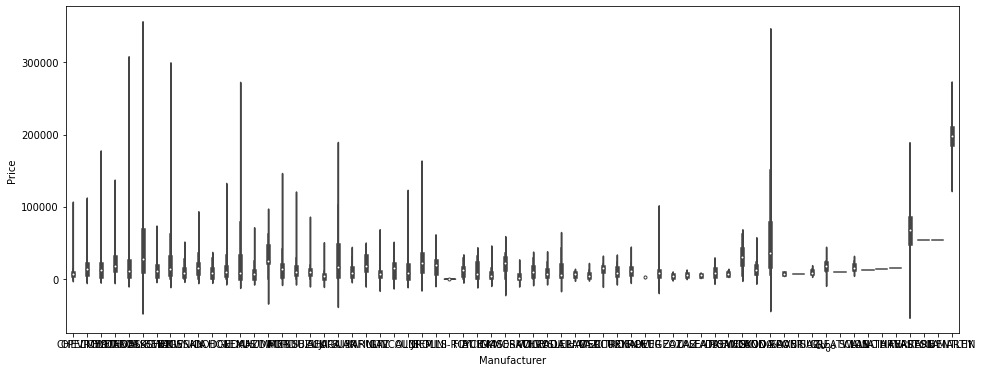

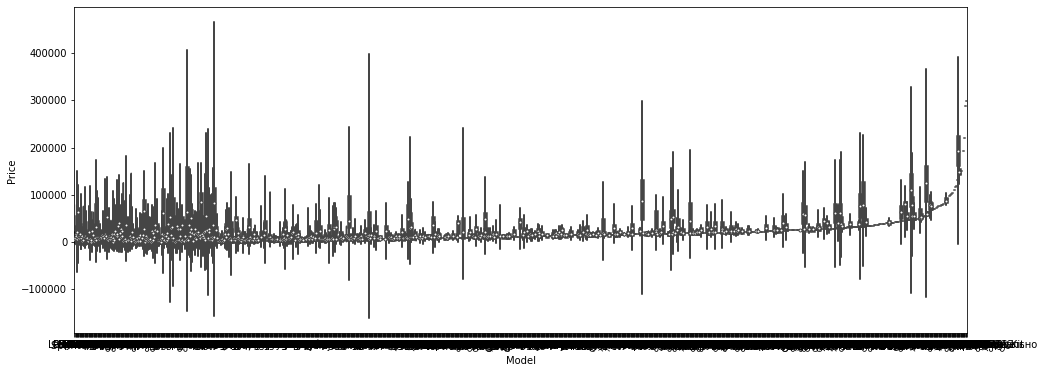

In [47]:
for categorical in categorical:
    plt.figure(figsize=(16, 6))
    sns.violinplot(y=car_price[target], x=car_price[categorical])
    plt.show()

Powyższe wykresy skrzypcowye pokazują częstotliwość występowania poszczególnych cech  w samochodach w różnych zakresach cenowych.

In [48]:
corr_df = car_price.copy()
corr_df = corr_df[['Price', 'Airbags']]
corr_df.corr()

,Price,Airbags
Price,1.000000,-0.018247
Airbags,-0.018247,1.000000


Ze względu na niską korelację ceny i poduszek powietrznych zdecydowaliśmy o usunięciu tej kolumny z naszych danych

In [49]:
car_price.drop(['Airbags'], axis=1, inplace=True)
car_price

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color
7815,1,OPEL,Astra,1999,Sedan,1,Petrol,1.6,122231,4.0,Manual,Front,4,Left wheel,Silver
16992,1,CHEVROLET,Lacetti,2006,Hatchback,0,Petrol,1.6,200000,4.0,Manual,Front,4,Left wheel,Black
13419,3,TOYOTA,Prius C,2012,Hatchback,1,Petrol,1.5,172800,4.0,Automatic,Front,4,Left wheel,Grey
17596,3,HYUNDAI,Sonata,2011,Sedan,1,Petrol,2.4,106422,4.0,Tiptronic,Front,4,Left wheel,White
7276,3,MERCEDES-BENZ,G 55 AMG,2020,Jeep,1,LPG,1.8,1212,12.0,Manual,4x4,5,Left wheel,Purple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10759,260296,LEXUS,LX 570,2018,Jeep,1,Petrol,5.7,17700,8.0,Tiptronic,4x4,4,Left wheel,Black
7749,288521,BMW,M5 Машина в максимально,2018,Sedan,1,Petrol,4.4,13500,8.0,Tiptronic,4x4,4,Left wheel,Black
9367,297930,MERCEDES-BENZ,AMG GT S,2015,Coupe,1,Petrol,4.0,20000,8.0,Tiptronic,Rear,2,Left wheel,White
14839,297930,LAND ROVER,Range Rover Vogue,2019,Jeep,1,Diesel,3.0,4500,8.0,Tiptronic,4x4,4,Left wheel,Black


### Wskazujemy, które zmienne są naszym X a które są naszym y

In [50]:
numeric = ['Prod. year', 'Engine volume', 'Mileage']
categorical = ['Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Cylinders', 'Doors', 'Manufacturer', 'Model']

target = 'Price'

In [51]:
X = car_price[numeric].copy()

display(X.iloc[:3])

y = car_price[target].copy()

display(y.iloc[:3])

,Prod. year,Engine volume,Mileage
7815,1999,1.6,122231
16992,2006,1.6,200000
13419,2012,1.5,172800


7815     1
16992    1
13419    3
Name: Price, dtype: int64

In [52]:
print(X.values[:3])

[[1.99900e+03 1.60000e+00 1.22231e+05]
 [2.00600e+03 1.60000e+00 2.00000e+05]
 [2.01200e+03 1.50000e+00 1.72800e+05]]


In [53]:
print(y.values[:3])

[1 1 3]


### Dzielimy zbiór na treningowy i testowy oraz wskazujemy jaka część to zbiór testowy.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

#### Printujemy wymiary

In [55]:
print(f'X.shape: {X.shape}, y.shape: {y.shape}')
print()
print(f'X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}')

X.shape: (19234, 3), y.shape: (19234,)

X_train.shape: (15387, 3), y_train.shape: (15387,)
X_test.shape: (3847, 3), y_test.shape: (3847,)


In [56]:
15387 + 3847

19234

## Standaryzacja

In [57]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# Ocena regresji

#### Trenujemy nasz model

In [58]:
lr_model = LinearRegression() 
lr_model.fit(X_train, y_train) 

LinearRegression()

#### Robimy predykcje dla zbioru treningowego i testowego

In [59]:
y_predict_train = lr_model.predict(X_train)
y_predict_test = lr_model.predict(X_test)

#### Dummy model

In [60]:
dummy_model = DummyRegressor(strategy='mean')  
dummy_model.fit(X_train, y_train)

DummyRegressor()

#### Predykcja (prognoza) na trenigowym i testowym

In [61]:
y_train_dummy = dummy_model.predict(X_train)
y_test_dummy = dummy_model.predict(X_test)

#### Test dummy modelu

In [62]:
y_test_dummy[:5] 

array([17141.70994996, 17141.70994996, 17141.70994996, 17141.70994996,
       17141.70994996])

#### Testowego

In [63]:
y_predict_test[:5]

array([18567.09255198, 14857.55485225, 19106.13315409, 15761.20390416,
        -931.74801192])

#### Współczynniki regresji

In [64]:
lr_model.intercept_

17141.709949957814

In [65]:
lr_model.coef_

array([5284.70249626, 2565.87542652,   64.08357422])

## Błędy

### MAE

In [66]:
print('Train')
print(f'Dummy: {mean_absolute_error(y_train, y_train_dummy)}')
print(f'RL Model: {mean_absolute_error(y_train, y_predict_train)}')
print('\nTest:')
print(f'Dummy: {mean_absolute_error(y_test, y_test_dummy)}')
print(f'RL Model: {mean_absolute_error(y_test, y_predict_test)}')

Train
Dummy: 12095.884972898415
RL Model: 11082.879632995322

Test:
Dummy: 12364.26749181405
RL Model: 11316.650872730608


In [67]:
(11316 - 11082)/11082

# czyli śr bład bezwzględny to ok 2% więc nieduża wartość
# jest ta różnica pomiędzy wartością prawdziwą i naszą prognozą

0.021115322144017325

### MAPE (%)

In [68]:
print('Test:')
print(f'Dummy: {mean_absolute_percentage_error(y_test, y_test_dummy)*100}%')
print(f'RL Model: {mean_absolute_percentage_error(y_test, y_predict_test)*100}%')

Test:
Dummy: 1997.454414620332%
RL Model: 1923.6276748036455%


### MSE 

In [69]:
mse_dummy = mean_squared_error(y_test, y_test_dummy)   
mse_model = mean_squared_error(y_test, y_predict_test)   

print('Test')
print(f'Dummy MSE: {mse_dummy}')
print(f'RL Model MSE: {mse_model}')

Test
Dummy MSE: 349194024.16874754
RL Model MSE: 313540824.6646781


### RMSE (pierwiastek z MSE)

In [70]:
print('Test:')
print(f'Dummy RMSE: {sqrt(mse_dummy)}')
print(f'RL Model RMSE: {sqrt(mse_model)}')

Test:
Dummy RMSE: 18686.73390854452
RL Model RMSE: 17707.084024894615


Widzimy, że Dummy model myli się o około 18686 natomiast nasz model o około 17707

## Wizualizacyjna ocena modelu

### Porównanie wartości prawdziwej z predykcją

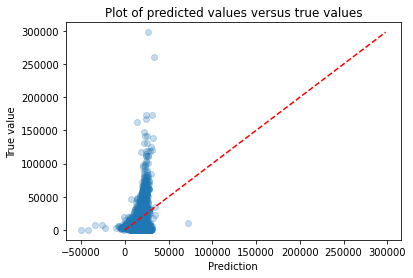

In [71]:
plt.scatter(x = y_predict_test, y = y_test, alpha=0.25)

xmin, xmax = y_test.min(), y_test.max()
x_line = np.linspace(xmin, xmax, 10)   
y_line = x_line

# Oczekiwana linia trendu

plt.plot(x_line, y_line, 'r--')  

plt.xlabel('Prediction')
plt.ylabel('True value')
plt.title('Plot of predicted values versus true values')
plt.show()

## Wykres reszt

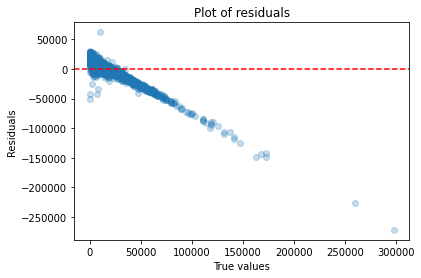

Error mean: 72.76400161268384


In [72]:
errors = y_predict_test - y_test
plt.scatter(x = y_test, y= errors, alpha=0.25)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('True values')
plt.ylabel('Residuals')
plt.title('Plot of residuals')
plt.show()
print(f'Error mean: {errors.mean()}')

## Histogram reszt

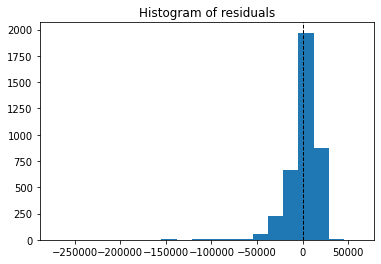

In [73]:
plt.hist(errors, bins=20)
plt.axvline(errors.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Histogram of residuals')
plt.show()

## Drzewo decyzyjne

In [74]:
X = car_price[numeric].copy()
y = car_price[target].copy()

#### Trenujemy model

In [75]:
model_tree = DecisionTreeRegressor()
model_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [76]:
y_predict_train_tree = model_tree.predict(X_train)
y_predict_test_tree = model_tree.predict(X_test)

In [77]:
y_predict_train_tree[:5]

array([13799.        , 19443.66666667,  9408.5       , 15681.        ,
       61521.        ])

In [78]:
y_predict_test_tree[:5] 

array([25387. , 10976. , 21987. , 15837.5,  7136. ])

### MAE dla drzewa decyzyjnego

In [79]:
print('Train')
print(f'Dummy: {mean_absolute_error(y_train, y_train_dummy)}')
print(f'RL Model_tree: {mean_absolute_error(y_train, y_predict_train_tree)}')
print('\nTest:')
print(f'Dummy: {mean_absolute_error(y_test, y_test_dummy)}')
print(f'RL Model_tree: {mean_absolute_error(y_test, y_predict_test_tree)}')

Train
Dummy: 12095.884972898415
RL Model_tree: 686.9548086976426

Test:
Dummy: 12364.26749181405
RL Model_tree: 8663.246007347634


### MAPE (%) dla drzewa decyzyjnego

In [80]:
print('Test:')
print(f'Dummy: {mean_absolute_percentage_error(y_test, y_test_dummy)*100}%')
print(f'RL Model_tree: {mean_absolute_percentage_error(y_test, y_predict_test_tree)*100}%')

Test:
Dummy: 1997.454414620332%
RL Model_tree: 1054.094046868795%


### MSE dla drzewa decyzyjnego

In [81]:
mse_dummy = mean_squared_error(y_test, y_test_dummy)   
mse_model = mean_squared_error(y_test, y_predict_test_tree)   

print('Test')
print(f'Dummy MSE: {mse_dummy}')
print(f'RL Model_tree MSE: {mse_model}')

Test
Dummy MSE: 349194024.16874754
RL Model_tree MSE: 324027464.0555398


### RMSE (pierwiastek z MSE) dla drzewa decyzyjnego

In [82]:
print('Test:')
print(f'Dummy RMSE: {sqrt(mse_dummy)}')
print(f'RL Model_tree RMSE: {sqrt(mse_model)}')

Test:
Dummy RMSE: 18686.73390854452
RL Model_tree RMSE: 18000.76287426563


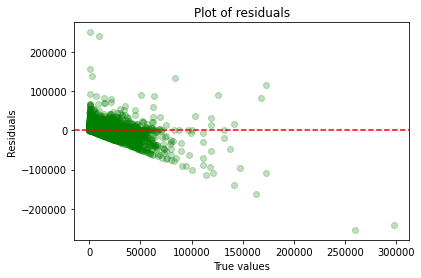

Error mean: 72.76400161268384


In [83]:
errors_tree = y_predict_test_tree - y_test
plt.scatter(x = y_test, y= errors_tree, color='g', alpha=0.25)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('True values')
plt.ylabel('Residuals')
plt.title('Plot of residuals')
plt.show()
print(f'Error mean: {errors.mean()}')

### Histogram reszt dla drzewa decyzyjnego

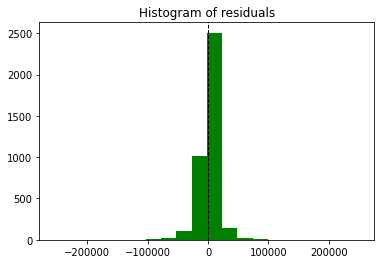

In [84]:
plt.hist(errors_tree, color='g', bins=20)
plt.axvline(errors.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Histogram of residuals')
plt.show()

### Porównianie błędów - linia regresji i drzewo decyzyjne

Test:

Dummy RMSE: 18686.73390854452

RL Model RMSE: 17707.084024894615

RL Model_tree RMSE: 17538.479285258883


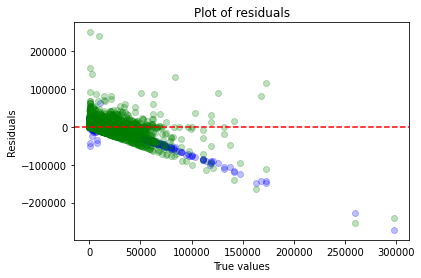

Error mean: 72.76400161268384


In [85]:
errors = y_predict_test - y_test
errors_tree = y_predict_test_tree - y_test
plt.scatter(x = y_test, y= errors, color='b', alpha=0.25)
plt.scatter(x = y_test, y= errors_tree, color='g', alpha=0.25)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('True values')
plt.ylabel('Residuals')
plt.title('Plot of residuals')
plt.show()
print(f'Error mean: {errors.mean()}')

### Histogram reszt - porównianie dla linii regresji i drzewa decyzyjnego

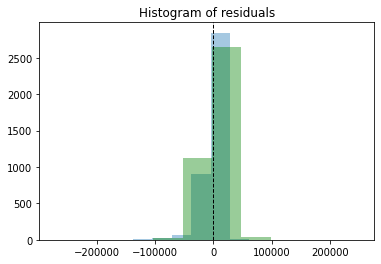

In [86]:
plt.hist(errors, bins=10, alpha=0.40)
plt.hist(errors_tree, color='g', bins=10, alpha=0.40)
plt.axvline(errors.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Histogram of residuals')
plt.show()

### Współczynnik determinacji

Sprawdźmy jaką część zmienności y wyjaśnia nasz model, lecz w pierwszej kolejności sprawdźmy to dla naszego prostego modelu 

In [87]:
from sklearn.metrics import r2_score

In [88]:
print(f'Dummy Train R^2: {r2_score(y_train, y_train_dummy)}') 
print(f'RL Model Train R^2: {r2_score(y_train, y_predict_train)}')

Dummy Train R^2: 0.0
RL Model Train R^2: 0.1013381521554082


Praktycznie możemy obliczyć R^2 dla zbioru treningowego, lecz z punktu Data Science - nie powinniśmy tego robić, poinieważ R^2 przekazuje nam informację o ile lepiej nasz model wyjaśnia zmienność niż średnia, stąd też R^2 dla modelu który jest średnią daje wynik 0. Jako, że z założenia nie znamy średniej ze zbioru testowego to i również nie powinniśmy dla tego zbioru liczyć R^2.

### Bias–variance tradeoff - Kompromis między obciążeniem a wariancją
Sprawdźmy jak różni się RMSE na zbiorze treningowym i testowym w zależności od stopnia wielomianu.

In [89]:
from sklearn.preprocessing import PolynomialFeatures

In [90]:
rmse_train_list = []
rmse_test_list = []
degree_list = []

for degree in [1, 2, 3, 4, 5, 6]:
    # W pierwszym kroku uczymy się na zbiorze treningowym
    poly_transformer = PolynomialFeatures(degree=degree)
    X_train_transformed = poly_transformer.fit_transform(X_train)
    polynomial_regression = LinearRegression() 
    polynomial_regression.fit(X_train_transformed, y_train)
    
    # Policzmy r^2 na zbiorze treningowym - zobaczymy jaką część wariancji wyjaśnia nasz model
    prediction_train = polynomial_regression.predict(X_train_transformed)
    r_2_result = r2_score(y_train, prediction_train)
    print(f'Degree: {degree}, R^2: {np.round(r_2_result, 2)}')
    
    # W następnym kroku wykorzystujemy nasz model na zbiorze testowym i wykonajmy predykcję
    X_test_transformed = poly_transformer.transform(X_test)
    prediction_test = polynomial_regression.predict(X_test_transformed)
    
    # Na koniec policzmy RMSE na naszych zbiorach i umieśmy w listach
    rmse_train_list.append(sqrt(mean_squared_error(y_train, prediction_train)))
    rmse_test_list.append(sqrt(mean_squared_error(y_test, prediction_test)))
    degree_list.append(degree)

Degree: 1, R^2: 0.1
Degree: 2, R^2: 0.13
Degree: 3, R^2: 0.14
Degree: 4, R^2: 0.15
Degree: 5, R^2: 0.18
Degree: 6, R^2: 0.19


In [91]:
rmse_train_list

[17229.13436738836,
 16961.37442911151,
 16838.63954248526,
 16711.7292083363,
 16485.919059069463,
 16370.78445526156]

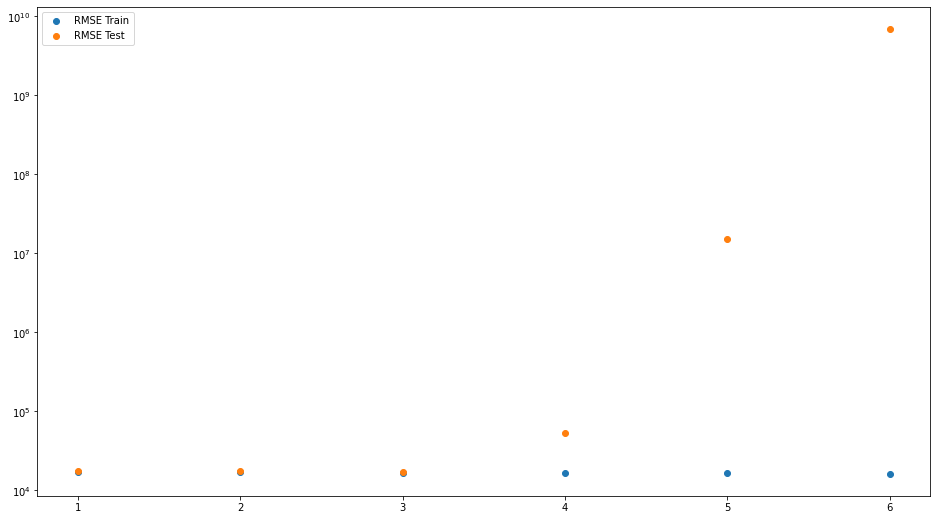

In [92]:
plt.figure(figsize=(16, 9))
plt.scatter(np.array(degree_list), np.array(rmse_train_list), label='RMSE Train')
plt.scatter(np.array(degree_list), np.array(rmse_test_list), label='RMSE Test')
plt.yscale('symlog')
plt.legend(loc='upper left')
plt.show()

Patrząc na wykres wygląda na to, że wyniki dla wielomianu 2-go i 3-go stopnia są najlepsze. Jednak od 4-go stopnia już widać coraz większą rozbieżność, tzn. na zbiorze treningowym są podobne a na testowym coraz lepsze. Może to świadczyć o niedouczeniu naszego modelu treningowego.

## Wybór hiperparametrów - motoda Grid Search (Siatka hiperparametrów) 

Nasz model musi najpierw przekształcić dane, a następnie na nich wytrenować model, stąd też kolejność działań jest istotna - stworzymy nasz pierwszy Pipeline, który uwzględnia różne operacje.

In [93]:
from sklearn.pipeline import make_pipeline 
from sklearn.model_selection import GridSearchCV

In [94]:
polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(),
                                               LinearRegression())
# Nasz model sprawdzi poniższe hiperparametry
params = {'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6]}

polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline, 
                                                params,
                                                scoring='neg_mean_squared_error',
                                                cv=10,
                                                verbose=10)

polynomial_regression_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', polynomial_regression_gridsearch.best_params_)

polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10; 1/6] START polynomialfeatures__degree=1...............................
[CV 1/10; 1/6] END polynomialfeatures__degree=1;, score=-370493293.230 total time=   0.0s
[CV 2/10; 1/6] START polynomialfeatures__degree=1...............................
[CV 2/10; 1/6] END polynomialfeatures__degree=1;, score=-268874321.020 total time=   0.0s
[CV 3/10; 1/6] START polynomialfeatures__degree=1...............................
[CV 3/10; 1/6] END polynomialfeatures__degree=1;, score=-294988765.368 total time=   0.0s
[CV 4/10; 1/6] START polynomialfeatures__degree=1...............................
[CV 4/10; 1/6] END polynomialfeatures__degree=1;, score=-362529552.744 total time=   0.0s
[CV 5/10; 1/6] START polynomialfeatures__degree=1...............................
[CV 5/10; 1/6] END polynomialfeatures__degree=1;, score=-307963409.429 total time=   0.0s
[CV 6/10; 1/6] START polynomialfeatures__degree=1...............................
[CV

In [95]:
predictions = polynomial_regression_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'RMSE: {sqrt(mse)}')

RMSE: 17516.257909362263


Zmiennych kategorycznych nie powinniśmy podnosić do kwadratu, tylko stworzyć z nich zmienne binarne dzięki One Hot Encoder. W związku z tym inaczej powinniśmy podchodzić do zmiennych kategorycznych a jeszcze inaczej do numerycznych.

In [96]:
numeric

['Prod. year', 'Engine volume', 'Mileage']

In [97]:
categorical

['Category',
 'Leather interior',
 'Fuel type',
 'Gear box type',
 'Drive wheels',
 'Wheel',
 'Color',
 'Cylinders',
 'Doors',
 'Manufacturer',
 'Model']

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

numeric_transformer = Pipeline(steps=[
    ('log_transformer', PowerTransformer()),
    ('standardscaler', StandardScaler()),
    ('polynomialfeatures', PolynomialFeatures())
])

categorical_transformer = Pipeline(steps=[
    ('OHE', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric),
        ('cat', categorical_transformer, categorical)
    ])

# Tworzenie pipeline'u opartego o przygotowanie (preprocessor) oraz model
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', LinearRegression())])

print(final_pipeline.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'regressor', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__verbose', 'preprocessor__num__log_transformer', 'preprocessor__num__standardscaler', 'preprocessor__num__polynomialfeatures', 'preprocessor__num__log_transformer__copy', 'preprocessor__num__log_transformer__method', 'preprocessor__num__log_transformer__standardize', 'preprocessor__num__standardscaler__copy', 'preprocessor__num__standardscaler__with_mean', 'preprocessor__num__standardscaler__with_std', 'preprocessor__num__polynomialfeatures__degree', 'preprocessor__num__polynomialfeatures__include_bias', 'preprocessor__num__polynomialfeatures__interaction_only', 'preprocessor__num__pol

In [99]:
params = {'preprocessor__num__polynomialfeatures__degree': [1, 2, 3, 4, 5, 6]}

final_gridsearch = GridSearchCV(final_pipeline,
                                params, 
                                scoring='neg_mean_squared_error',
                                cv=10,
                                verbose=10)

final_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', final_gridsearch.best_params_)

final_model = final_gridsearch.best_estimator_

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10; 1/6] START preprocessor__num__polynomialfeatures__degree=1............
[CV 1/10; 1/6] END preprocessor__num__polynomialfeatures__degree=1;, score=nan total time=   0.0s
[CV 2/10; 1/6] START preprocessor__num__polynomialfeatures__degree=1............
[CV 2/10; 1/6] END preprocessor__num__polynomialfeatures__degree=1;, score=nan total time=   0.0s
[CV 3/10; 1/6] START preprocessor__num__polynomialfeatures__degree=1............
[CV 3/10; 1/6] END preprocessor__num__polynomialfeatures__degree=1;, score=nan total time=   0.0s
[CV 4/10; 1/6] START preprocessor__num__polynomialfeatures__degree=1............
[CV 4/10; 1/6] END preprocessor__num__polynomialfeatures__degree=1;, score=nan total time=   0.0s
[CV 5/10; 1/6] START preprocessor__num__polynomialfeatures__degree=1............
[CV 5/10; 1/6] END preprocessor__num__polynomialfeatures__degree=1;, score=nan total time=   0.0s
[CV 6/10; 1/6] START preprocessor__num__poly

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

In [ ]:
print(f'Old RMSE: {sqrt(mse)}')
new_predictions = final_model.predict(X_test)
new_mse = mean_squared_error(y_test, new_predictions)
print(f'RMSE: {sqrt(new_mse)}')